In [1]:
import pandas as pd
import json
import numpy as np

In [5]:
song_data = pd.read_csv('data/spotify_api/data.csv')
song_rankings = pd.read_csv('data/spotify_rankings/data.csv')

In [41]:
song_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,24
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,19
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,20
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,23


In [42]:
len(song_data)

169909

In [43]:
song_rankings.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [46]:
len(song_rankings)

3441197

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
features = song_data[['acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 
                      'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']]

In [11]:
normalized_features = (features - features.mean()) / features.std()

In [21]:
distances = []
k_vals = list(range(5, 105, 5))
for k in k_vals:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_features.values)
    distances.append(km.inertia_)

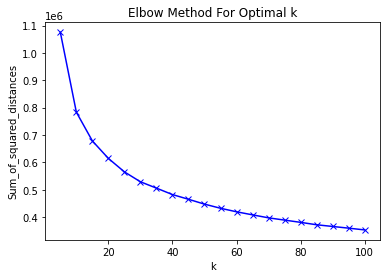

In [22]:
plt.plot(k_vals, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=25)
clusters = kmeans.fit_predict(normalized_features.values)

In [35]:
song_data['cluster'] = clusters

In [36]:
song_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,24
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,19
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,20
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,23


In [40]:
song_data[song_data['cluster'] == 2]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
2998,0.043000,['Lil Boodang'],0.881,90578,0.713,1,7CitsF5wUj9aYSCFcrZHQD,0.905000,1,0.2230,-9.665,1,Diabetes Control Tips,26,1969-04-01,0.0565,106.052,0.4540,1969,2
3799,0.001500,['The Jam'],0.388,150627,0.825,1,1pXXriSh4lpOKFqsAWVdHe,0.000004,9,0.1380,-10.555,1,The Modern World,39,1977-11-18,0.0557,159.744,0.8530,1977,2
3929,0.527000,['The Rolling Stones'],0.474,276933,0.938,1,27wGhiwP01mXNsS0clLm0U,0.520000,9,0.2990,-2.643,1,Some Girls - Remastered,26,1978-06-09,0.0898,71.995,0.5050,1978,2
4282,0.393000,['Witchfinder General'],0.289,231827,0.713,1,6qmIAYQ36jyhTK9Bkej25q,0.000000,5,0.3540,-9.584,1,Witchfinder General,33,1982-01-01,0.0580,95.840,0.3810,1982,2
4341,0.000885,['The Adicts'],0.574,185773,0.875,1,5LNc3zqDewKU6RVF9Rijix,0.015000,10,0.1200,-6.046,1,Johnny Was A Soldier,31,1982,0.0414,102.867,0.8480,1982,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169889,0.069400,"['Lil Wayne', 'Lil Uzi Vert']",0.877,234055,0.554,1,33NAQaVm6TRv1phc0fPsfb,0.000000,1,0.0521,-5.905,1,Multiple Flows (with Lil Uzi Vert),65,2020-05-29,0.3020,126.073,0.5850,2020,2
169891,0.013400,['Eminem'],0.871,200573,0.493,1,34d7sGX6WUqq8f04e7CSNF,0.000241,1,0.3850,-6.356,1,Marsh,70,2020-01-17,0.2050,144.989,0.0495,2020,2
169898,0.254000,['YoungBoy Never Broke Again'],0.506,175339,0.787,1,0KVEBQA98JvkmB5ZydQ13k,0.000000,8,0.1120,-6.634,1,Fine By Time,64,2020-02-21,0.1610,99.956,0.3330,2020,2
169902,0.022700,"['Trey Songz', 'Summer Walker']",0.619,194576,0.719,1,5QZ11AHm7xiytOGXGlxQi5,0.000000,0,0.0839,-4.111,1,Back Home (feat. Summer Walker),69,2020-04-29,0.1570,86.036,0.3510,2020,2
